In [2]:
import pandas as pd

In [3]:
import csv 

In [4]:
import numpy as np

In [5]:
import scipy.stats as st

In [6]:
from __future__ import print_function

In [7]:
from pylab import *

In [8]:
 from sklearn.linear_model import LinearRegression

In [9]:
import seaborn as sns

In [10]:
import statsmodels.formula.api as sm

In [11]:
def numeric_statistics(x):
    _x = x  # Для возможности предобработки данных (например, исключения нечисловых значений) 
    result = []
    result.append(len(x)) # Чисо элементов выборки
    result.append(np.mean(_x)) # среднее
    result.append((np.min(_x), np.max(_x))) # (min, max)
    result.append(np.std(_x)) # стандартное отклонение
    result.append(100.0 * result[-1]/result[0]) # коэффициент вариации (Пирсона)
    result.append((np.percentile(_x, 25), np.percentile(_x, 50), np.percentile(_x, 75))) # квартили
    result.append(st.mode(_x))  # мода
    result.append(st.skew(_x))  # асимметрия 
    result.append(st.kurtosis(_x))  # эксцесс
    _range = np.linspace(0.9 * np.min(_x), 1.1 * np.max(_x), 100) # область определения для оценки плотности
    result.append((_range, st.gaussian_kde(_x)(_range)))  # оценка плотности распределения
    
    return tuple(result)

In [12]:
def categorical_statistics(x):
    from collections import Counter
    c = Counter(x) # используется для подсчета уникальных элементов
    result = []
    result.append(len(x))  # Число элементов в выборке
    result.append(dict(c))  # Число уникальных элементов представителей
    result.append({x: c[x]/float(result[0])  for x in dict(c)}) # Встречаемость элементов
    result.append(np.log(len(x))) # Максимальная энтропия
    
    return tuple(result)

In [13]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', -1)

In [14]:
features_data = pd.read_csv('C:/Users/hp/Desktop/students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

features_data.shape

(35, 2)

In [15]:
features_data.head(35)

Признак  \
0   ID           
1   Subject      
2   school       
3   sex          
4   age          
5   address      
6   famsize      
7   Pstatus      
8   Medu         
9   Fedu         
10  Mjob         
11  Fjob         
12  reason       
13  guardian     
14  traveltime   
15  studytime    
16  failures     
17  schoolsup    
18  famsup       
19  paid         
20  activities   
21  nursery      
22  higher       
23  internet     
24  romantic     
25  famrel       
26  freetime     
27  goout        
28  Dalc         
29  Walc         
30  health       
31  absences     
32  G1           
33  G2           
34  G3           

                                                                                                                                                                              Описание  
0   Уникальный номер наблюдения                                                                                                                                                         
1   Предмет: 'Math' - математика, 'Por' - португальский язык                                                                                                                            
2   Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira                                                                                                                          
3   Пол студента: 'F' - женский, 'M' - мужской                                                                                                                                          
4   Возраст студента                                                                                                                                                                    
5   Место проживания студента: 'U' - в городе, 'R' - за городом                                                                                                                         
6   Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3                                                                                                                             
7   Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно                                                                                                                      
8   Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование                                                
9   Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование                                                  
10  Работа матери: 'teacher' - связана с преподаванием, 'health'  - связана с здравоохранением, 'services' - администрация и полиция, 'at_home' - домашняя занятость, 'other' - другое  
11  Работа отца: 'teacher' - связана с преподаванием, 'health'  - связана с здравоохранением, 'services' - администрация и полиция, 'at_home' - домашняя занятость, 'other' - другое    
12  Причина, по которой студент выбрал данную школу: 'home' - рядом с домом, 'reputation' - репутация школы, 'course' - читаемые курсы, 'other' - другое                                
13  Опекун студента (student's guardian): 'mother', 'father' или 'other'                                                                                                                
14  Время в пути от дома до школы: 1 - < 15 мин, 2 - от 15 до 30 мин, 3 - от 30 мин до 1 часа, 4 - > 1 часа                                                                             
15  Количество часов на учебу в неделю: 1 - < 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, 4 - > 10 часов                                                                        
16  Число завалов студента по предыдущим курсам:  n если 1<=n<3, иначе 4                                                                                                                
17  Дополнительная помощь в 

In [16]:
data = pd.read_csv('C:/Users/hp/Desktop/students_data.csv',
            delimiter=';',
            encoding='windows-1251')

data.shape

(1044, 35)

In [17]:
data.head(15)

ID Subject school sex  age address famsize Pstatus  Medu  Fedu  \
0   100097  Por     GP     F   16   U       GT3     A       3     4      
1   101021  Por     GP     F   17   U       GT3     T       3     2      
2   102965  Por     GP     M   16   U       LE3     T       1     2      
3   102989  Por     MS     M   17   U       GT3     T       2     3      
4   103131  Por     GP     F   16   U       GT3     T       1     1      
5   103144  Por     GP     M   18   U       LE3     T       3     1      
6   105257  Por     MS     F   18   U       GT3     T       1     1      
7   107639  Por     MS     F   15   R       GT3     T       4     4      
8   107914  Math    GP     F   15   U       LE3     T       3     2      
9   108089  Por     MS     M   16   R       GT3     T       3     4      
10  108254  Por     GP     M   15   U       LE3     T       4     4      
11  108296  Por     GP     M   18   U       LE3     T       3     4      
12  108753  Math    MS     F   18   R       GT3     T       4     4      
13  108825  Por     GP     M   15   U       GT3     T       4     3      
14  114462  Math    GP     F   16   U       LE3     T       2     2      

        Mjob      Fjob      reason guardian  traveltime  studytime  failures  \
0   services  other     course      father   1           1          0          
1   other     other     course      mother   1           2          0          
2   health    services  course      mother   2           1          2          
3   other     services  home        father   2           2          0          
4   at_home   other     home        mother   2           1          0          
5   services  services  course      mother   2           1          0          
6   other     other     course      mother   2           2          0          
7   teacher   other     course      mother   2           1          0          
8   services  other     reputation  mother   1           2          0          
9   other     health    other       mother   3           2          0          
10  health    services  course      father   1           1          0          
11  services  other     home        mother   1           2          0          
12  teacher   at_home   reputation  mother   3           1          0          
13  teacher   other     home        mother   1           2          0          
14  at_home   other     course      mother   1           2          0          

   schoolsup famsup paid activities nursery higher internet romantic  famrel  \
0   no        no     no   no         yes     yes    yes      no       3        
1   no        no     no   yes        no      yes    yes      no       5        
2   no        no     no   no         no      yes    yes      no       4        
3   no        no     no   yes        yes     yes    yes      no       4        
4   no        yes    no   no         yes     yes    no       no       4        
5   no        no     no   yes        yes     yes    yes      yes      3        
6   no        no     no   yes        yes     yes    no       no       1        
7   no        no     no   no         yes     yes    yes      yes      1        
8   no        yes    yes  no         yes     yes    yes      no       4        
9   no        no     no   no         no      yes    no       no       3        
10  no        yes    no   yes        yes     yes    yes      no       4        
11  no        no     no   yes        yes     yes    yes      yes      4        
12  no        yes    yes  yes        yes     yes    yes      yes      4        
13  no        yes    no   yes        yes     yes    yes      no       4        
14  no        yes    no   no         yes     yes    no       no       4        

    freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0   2         1      1     4     5       12        15  13  14  
1   3         4      1     3     3       2         17  18  17  
2   4         5      3     5     5       0         9   8   10  
3   4

In [18]:
data.isnull().sum().sum()

0

In [19]:
n, uniques, freq, maxentropy = categorical_statistics(data.famsize)

print('Число элементов выборки: {0:d}'.format(n))
print('Количество объектов по видам: {0}'.format(uniques))
print('Встречаемость объектов: {0}'.format(freq))
print('Максимальная энтропия: {0:.4f}'.format(maxentropy))

Число элементов выборки: 1044
Количество объектов по видам: {'GT3': 738, 'LE3': 306}
Встречаемость объектов: {'GT3': 0.7068965517241379, 'LE3': 0.29310344827586204}
Максимальная энтропия: 6.9508


In [20]:
n, uniques, freq, maxentropy = categorical_statistics(data.reason)

print('Число элементов выборки: {0:d}'.format(n))
print('Количество объектов по видам: {0}'.format(uniques))
print('Встречаемость объектов: {0}'.format(freq))
print('Максимальная энтропия: {0:.4f}'.format(maxentropy))

Число элементов выборки: 1044
Количество объектов по видам: {'course': 430, 'home': 258, 'reputation': 248, 'other': 108}
Встречаемость объектов: {'course': 0.4118773946360153, 'home': 0.2471264367816092, 'reputation': 0.23754789272030652, 'other': 0.10344827586206896}
Максимальная энтропия: 6.9508


Число элементов выборки: 1044
Среднее значение: 1.9703
Минимальное и максимальное значения: (1.0000, 4.0000)
Стандартное отклонение: 0.8340
Коэффициент вариации (Пирсона): 0.0799
Квартили: (25%) = 1.0000, (50%) = 2.0000, (75%) = 2.0000
Коэффициент асимметрии: 0.6700
Коэффициент эксцесса: 0.0008


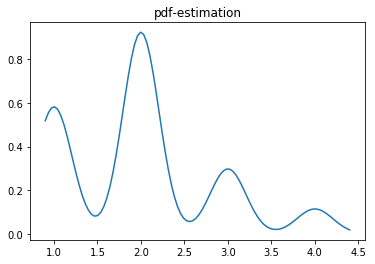

In [21]:
n, m, minmax, s, cv, perct, mode, skew, kurt, kde = numeric_statistics(data.studytime)

print('Число элементов выборки: {0:d}'.format(n))
print('Среднее значение: {0:.4f}'.format(m))
print('Минимальное и максимальное значения: ({0:.4f}, {1:.4f})'.format(*minmax))
print('Стандартное отклонение: {0:.4f}'.format(s))
print('Коэффициент вариации (Пирсона): {0:.4f}'.format(cv))
print('Квартили: (25%) = {0:.4f}, (50%) = {1:.4f}, (75%) = {2:.4f}'.format(*perct))
print('Коэффициент асимметрии: {0:.4f}'.format(skew))
print('Коэффициент эксцесса: {0:.4f}'.format(kurt))

figure()
plot(kde[0], kde[1])
title('pdf-estimation')
show()

Число элементов выборки: 1044
Среднее значение: 11.2136
Минимальное и максимальное значения: (0.0000, 19.0000)
Стандартное отклонение: 2.9820
Коэффициент вариации (Пирсона): 0.2856
Квартили: (25%) = 9.0000, (50%) = 11.0000, (75%) = 13.0000
Коэффициент асимметрии: 0.0778
Коэффициент эксцесса: -0.3332


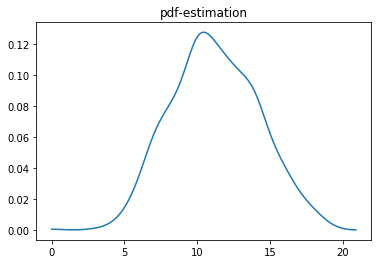

In [22]:
n, m, minmax, s, cv, perct, mode, skew, kurt, kde = numeric_statistics(data.G1)

print('Число элементов выборки: {0:d}'.format(n))
print('Среднее значение: {0:.4f}'.format(m))
print('Минимальное и максимальное значения: ({0:.4f}, {1:.4f})'.format(*minmax))
print('Стандартное отклонение: {0:.4f}'.format(s))
print('Коэффициент вариации (Пирсона): {0:.4f}'.format(cv))
print('Квартили: (25%) = {0:.4f}, (50%) = {1:.4f}, (75%) = {2:.4f}'.format(*perct))
print('Коэффициент асимметрии: {0:.4f}'.format(skew))
print('Коэффициент эксцесса: {0:.4f}'.format(kurt))

figure()
plot(kde[0], kde[1])
title('pdf-estimation')
show()

Число элементов выборки: 1044
Среднее значение: 11.2462
Минимальное и максимальное значения: (0.0000, 19.0000)
Стандартное отклонение: 3.2835
Коэффициент вариации (Пирсона): 0.3145
Квартили: (25%) = 9.0000, (50%) = 11.0000, (75%) = 13.0000
Коэффициент асимметрии: -0.4966
Коэффициент эксцесса: 1.3235


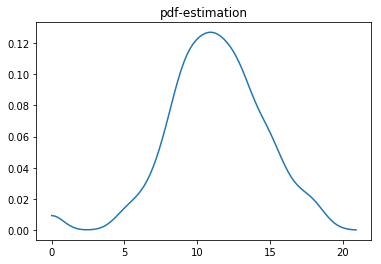

In [23]:
n, m, minmax, s, cv, perct, mode, skew, kurt, kde = numeric_statistics(data.G2)

print('Число элементов выборки: {0:d}'.format(n))
print('Среднее значение: {0:.4f}'.format(m))
print('Минимальное и максимальное значения: ({0:.4f}, {1:.4f})'.format(*minmax))
print('Стандартное отклонение: {0:.4f}'.format(s))
print('Коэффициент вариации (Пирсона): {0:.4f}'.format(cv))
print('Квартили: (25%) = {0:.4f}, (50%) = {1:.4f}, (75%) = {2:.4f}'.format(*perct))
print('Коэффициент асимметрии: {0:.4f}'.format(skew))
print('Коэффициент эксцесса: {0:.4f}'.format(kurt))

figure()
plot(kde[0], kde[1])
title('pdf-estimation')
show()

Число элементов выборки: 1044
Среднее значение: 11.3420
Минимальное и максимальное значения: (0.0000, 20.0000)
Стандартное отклонение: 3.8629
Коэффициент вариации (Пирсона): 0.3700
Квартили: (25%) = 10.0000, (50%) = 11.0000, (75%) = 14.0000
Коэффициент асимметрии: -0.9845
Коэффициент эксцесса: 1.7302


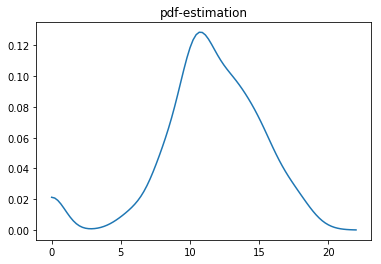

In [24]:
n, m, minmax, s, cv, perct, mode, skew, kurt, kde = numeric_statistics(data.G3)

print('Число элементов выборки: {0:d}'.format(n))
print('Среднее значение: {0:.4f}'.format(m))
print('Минимальное и максимальное значения: ({0:.4f}, {1:.4f})'.format(*minmax))
print('Стандартное отклонение: {0:.4f}'.format(s))
print('Коэффициент вариации (Пирсона): {0:.4f}'.format(cv))
print('Квартили: (25%) = {0:.4f}, (50%) = {1:.4f}, (75%) = {2:.4f}'.format(*perct))
print('Коэффициент асимметрии: {0:.4f}'.format(skew))
print('Коэффициент эксцесса: {0:.4f}'.format(kurt))

figure()
plot(kde[0], kde[1])
title('pdf-estimation')
show()

In [25]:
columns = ['Subject']
subject = pd.DataFrame(data, columns = columns)
subject['Subject'] = subject['Subject'].map({'Por': 0, 'Math': 1})

subject.shape

(1044, 1)

In [26]:
subject.head(15)

Subject
0   0      
1   0      
2   0      
3   0      
4   0      
5   0      
6   0      
7   0      
8   1      
9   0      
10  0      
11  0      
12  1      
13  0      
14  1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F04BD54C18>,
      dtype=object)

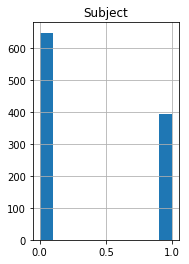

In [27]:
subject.hist(layout=(1,2))   

In [28]:
columns = ['Subject', 'G1', 'G2', 'G3']
Por_density = pd.DataFrame(data, columns=columns)

Por_density.drop(Por_density[Por_density.Subject == 'Math'].index, inplace=True)

Por_density.shape

(649, 4)

In [29]:
Por_density.head(15)

Subject  G1  G2  G3
0   Por     15  13  14
1   Por     17  18  17
2   Por     9   8   10
3   Por     14  15  16
4   Por     12  13  13
5   Por     11  11  12
6   Por     11  12  9 
7   Por     13  14  14
9   Por     9   10  11
10  Por     12  13  12
11  Por     16  16  17
13  Por     11  11  11
18  Por     12  13  12
19  Por     8   8   9 
20  Por     8   6   8

Число элементов выборки: 649
Среднее значение: 11.9060
Минимальное и максимальное значения: (0.0000, 19.0000)
Стандартное отклонение: 3.2282
Коэффициент вариации (Пирсона): 0.4974
Квартили: (25%) = 10.0000, (50%) = 12.0000, (75%) = 14.0000
Коэффициент асимметрии: -0.9108
Коэффициент эксцесса: 2.6821


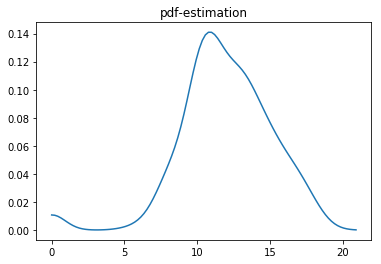

In [30]:
n, m, minmax, s, cv, perct, mode, skew, kurt, kde = numeric_statistics(Por_density.G3)

print('Число элементов выборки: {0:d}'.format(n))
print('Среднее значение: {0:.4f}'.format(m))
print('Минимальное и максимальное значения: ({0:.4f}, {1:.4f})'.format(*minmax))
print('Стандартное отклонение: {0:.4f}'.format(s))
print('Коэффициент вариации (Пирсона): {0:.4f}'.format(cv))
print('Квартили: (25%) = {0:.4f}, (50%) = {1:.4f}, (75%) = {2:.4f}'.format(*perct))
print('Коэффициент асимметрии: {0:.4f}'.format(skew))
print('Коэффициент эксцесса: {0:.4f}'.format(kurt))

figure()
plot(kde[0], kde[1])
title('pdf-estimation')
show()

Число элементов выборки: 649
Среднее значение: 11.3991
Минимальное и максимальное значения: (0.0000, 19.0000)
Стандартное отклонение: 2.7431
Коэффициент вариации (Пирсона): 0.4227
Квартили: (25%) = 10.0000, (50%) = 11.0000, (75%) = 13.0000
Коэффициент асимметрии: -0.0028
Коэффициент эксцесса: 0.0271


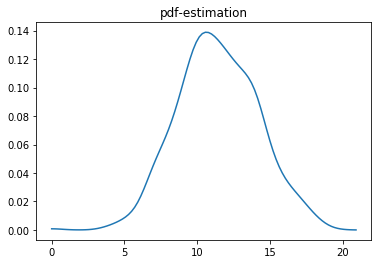

In [31]:
n, m, minmax, s, cv, perct, mode, skew, kurt, kde = numeric_statistics(Por_density.G1)

print('Число элементов выборки: {0:d}'.format(n))
print('Среднее значение: {0:.4f}'.format(m))
print('Минимальное и максимальное значения: ({0:.4f}, {1:.4f})'.format(*minmax))
print('Стандартное отклонение: {0:.4f}'.format(s))
print('Коэффициент вариации (Пирсона): {0:.4f}'.format(cv))
print('Квартили: (25%) = {0:.4f}, (50%) = {1:.4f}, (75%) = {2:.4f}'.format(*perct))
print('Коэффициент асимметрии: {0:.4f}'.format(skew))
print('Коэффициент эксцесса: {0:.4f}'.format(kurt))

figure()
plot(kde[0], kde[1])
title('pdf-estimation')
show()

Число элементов выборки: 649
Среднее значение: 11.5701
Минимальное и максимальное значения: (0.0000, 19.0000)
Стандартное отклонение: 2.9114
Коэффициент вариации (Пирсона): 0.4486
Квартили: (25%) = 10.0000, (50%) = 11.0000, (75%) = 13.0000
Коэффициент асимметрии: -0.3594
Коэффициент эксцесса: 1.6405


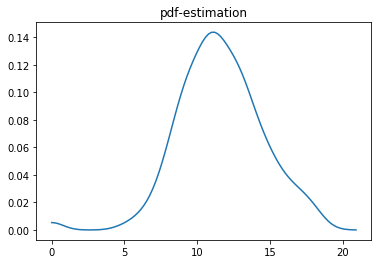

In [32]:
n, m, minmax, s, cv, perct, mode, skew, kurt, kde = numeric_statistics(Por_density.G2)

print('Число элементов выборки: {0:d}'.format(n))
print('Среднее значение: {0:.4f}'.format(m))
print('Минимальное и максимальное значения: ({0:.4f}, {1:.4f})'.format(*minmax))
print('Стандартное отклонение: {0:.4f}'.format(s))
print('Коэффициент вариации (Пирсона): {0:.4f}'.format(cv))
print('Квартили: (25%) = {0:.4f}, (50%) = {1:.4f}, (75%) = {2:.4f}'.format(*perct))
print('Коэффициент асимметрии: {0:.4f}'.format(skew))
print('Коэффициент эксцесса: {0:.4f}'.format(kurt))

figure()
plot(kde[0], kde[1])
title('pdf-estimation')
show()

In [33]:
columns = ['Subject', 'G1', 'G2', 'G3']
Math_density = pd.DataFrame(data, columns=columns)

Math_density.drop(Math_density[Math_density.Subject == 'Por'].index, inplace=True)

Math_density.shape

(395, 4)

In [34]:
Math_density.head(15)

Subject  G1  G2  G3
8   Math    7   6   6 
12  Math    6   5   6 
14  Math    8   7   6 
15  Math    9   7   8 
16  Math    6   9   8 
17  Math    11  11  11
22  Math    12  13  14
23  Math    10  13  13
26  Math    13  13  13
27  Math    18  18  18
28  Math    15  16  15
30  Math    12  11  11
31  Math    9   10  9 
39  Math    10  9   10
44  Math    11  15  15

Число элементов выборки: 395
Среднее значение: 10.4152
Минимальное и максимальное значения: (0.0000, 20.0000)
Стандартное отклонение: 4.5756
Коэффициент вариации (Пирсона): 1.1584
Квартили: (25%) = 8.0000, (50%) = 11.0000, (75%) = 14.0000
Коэффициент асимметрии: -0.7299
Коэффициент эксцесса: 0.3832


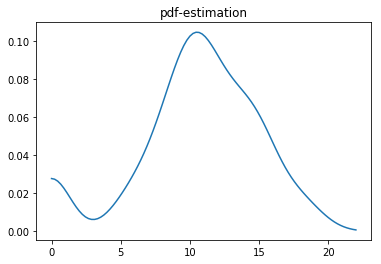

In [35]:
n, m, minmax, s, cv, perct, mode, skew, kurt, kde = numeric_statistics(Math_density.G3)

print('Число элементов выборки: {0:d}'.format(n))
print('Среднее значение: {0:.4f}'.format(m))
print('Минимальное и максимальное значения: ({0:.4f}, {1:.4f})'.format(*minmax))
print('Стандартное отклонение: {0:.4f}'.format(s))
print('Коэффициент вариации (Пирсона): {0:.4f}'.format(cv))
print('Квартили: (25%) = {0:.4f}, (50%) = {1:.4f}, (75%) = {2:.4f}'.format(*perct))
print('Коэффициент асимметрии: {0:.4f}'.format(skew))
print('Коэффициент эксцесса: {0:.4f}'.format(kurt))

figure()
plot(kde[0], kde[1])
title('pdf-estimation')
show()

Число элементов выборки: 395
Среднее значение: 10.7139
Минимальное и максимальное значения: (0.0000, 19.0000)
Стандартное отклонение: 3.7567
Коэффициент вариации (Пирсона): 0.9511
Квартили: (25%) = 9.0000, (50%) = 11.0000, (75%) = 13.0000
Коэффициент асимметрии: -0.4300
Коэффициент эксцесса: 0.6046


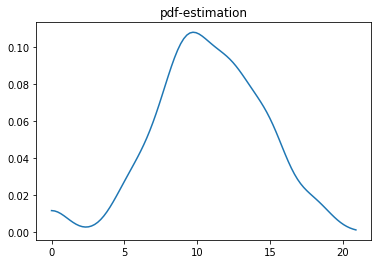

In [36]:
n, m, minmax, s, cv, perct, mode, skew, kurt, kde = numeric_statistics(Math_density.G2)

print('Число элементов выборки: {0:d}'.format(n))
print('Среднее значение: {0:.4f}'.format(m))
print('Минимальное и максимальное значения: ({0:.4f}, {1:.4f})'.format(*minmax))
print('Стандартное отклонение: {0:.4f}'.format(s))
print('Коэффициент вариации (Пирсона): {0:.4f}'.format(cv))
print('Квартили: (25%) = {0:.4f}, (50%) = {1:.4f}, (75%) = {2:.4f}'.format(*perct))
print('Коэффициент асимметрии: {0:.4f}'.format(skew))
print('Коэффициент эксцесса: {0:.4f}'.format(kurt))

figure()
plot(kde[0], kde[1])
title('pdf-estimation')
show()

Число элементов выборки: 395
Среднее значение: 10.9089
Минимальное и максимальное значения: (3.0000, 19.0000)
Стандартное отклонение: 3.3150
Коэффициент вариации (Пирсона): 0.8392
Квартили: (25%) = 8.0000, (50%) = 11.0000, (75%) = 13.0000
Коэффициент асимметрии: 0.2397
Коэффициент эксцесса: -0.7002


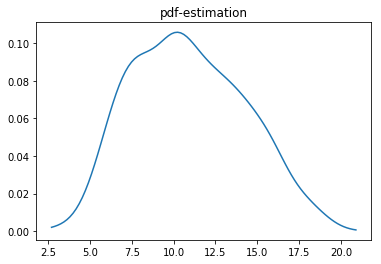

In [37]:
n, m, minmax, s, cv, perct, mode, skew, kurt, kde = numeric_statistics(Math_density.G1)

print('Число элементов выборки: {0:d}'.format(n))
print('Среднее значение: {0:.4f}'.format(m))
print('Минимальное и максимальное значения: ({0:.4f}, {1:.4f})'.format(*minmax))
print('Стандартное отклонение: {0:.4f}'.format(s))
print('Коэффициент вариации (Пирсона): {0:.4f}'.format(cv))
print('Квартили: (25%) = {0:.4f}, (50%) = {1:.4f}, (75%) = {2:.4f}'.format(*perct))
print('Коэффициент асимметрии: {0:.4f}'.format(skew))
print('Коэффициент эксцесса: {0:.4f}'.format(kurt))

figure()
plot(kde[0], kde[1])
title('pdf-estimation')
show()

In [38]:
columns = ['sex', 'traveltime', 'famsup', 'paid', 'internet', 'romantic', 'Walc','G3' ]
regression_parametrs = pd.DataFrame(data, columns=columns)

regression_parametrs.shape
regression_parametrs.head(15)

sex  traveltime famsup paid internet romantic  Walc  G3
0   F   1           no     no   yes      no       4     14
1   F   1           no     no   yes      no       3     17
2   M   2           no     no   yes      no       5     10
3   M   2           no     no   yes      no       1     16
4   F   2           yes    no   no       no       4     13
5   M   2           no     no   yes      yes      5     12
6   F   2           no     no   no       no       1     9 
7   F   2           no     no   yes      yes      5     14
8   F   1           yes    yes  yes      no       1     6 
9   M   3           no     no   no       no       2     11
10  M   1           yes    no   yes      no       3     12
11  M   1           no     no   yes      yes      3     17
12  F   3           yes    yes  yes      yes      2     6 
13  M   1           yes    no   yes      no       3     11
14  F   1           yes    no   no       no       2     6

In [39]:
regression_parametrs['famsup'] = regression_parametrs['famsup'].map({'no': 0, 'yes': 1})

In [40]:
regression_parametrs['sex'] = regression_parametrs['sex'].map({'F': 0, 'M': 1})

In [41]:
regression_parametrs['paid'] = regression_parametrs['paid'].map({'no': 0, 'yes': 1})

In [42]:
regression_parametrs['internet'] = regression_parametrs['internet'].map({'no': 0, 'yes': 1})

In [43]:
regression_parametrs['romantic'] = regression_parametrs['romantic'].map({'no': 0, 'yes': 1})

In [44]:
regression_parametrs.shape
regression_parametrs.head(15)

sex  traveltime  famsup  paid  internet  romantic  Walc  G3
0   0    1           0       0     1         0         4     14
1   0    1           0       0     1         0         3     17
2   1    2           0       0     1         0         5     10
3   1    2           0       0     1         0         1     16
4   0    2           1       0     0         0         4     13
5   1    2           0       0     1         1         5     12
6   0    2           0       0     0         0         1     9 
7   0    2           0       0     1         1         5     14
8   0    1           1       1     1         0         1     6 
9   1    3           0       0     0         0         2     11
10  1    1           1       0     1         0         3     12
11  1    1           0       0     1         1         3     17
12  0    3           1       1     1         1         2     6 
13  1    1           1       0     1         0         3     11
14  0    1           1       0     0         0         2     6

In [45]:
lr = LinearRegression()
X = regression_parametrs.iloc[:, 0:7]
y = regression_parametrs.iloc[:, 7]

y = y.replace(0, 1e-6)

lr.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

lr.coef_

array([-0.10807896, -0.41153001,  0.01854819, -0.6318679 ,  1.06865004,
       -0.86796814, -0.32663256])

In [46]:
lr.score(X, y, sample_weight=None)

0.04692543818479056

In [47]:
columns = ['reason', 'G3']

reason_density_Otl = pd.DataFrame(data, columns=columns)

reason_density_Otl.drop(reason_density_Otl[reason_density_Otl.G3 < 18].index, inplace=True)

reason_density_Otl.shape

(35, 2)

In [48]:
reason_density_Otl['reason'] = reason_density_Otl['reason'].map({'home': 1, 'reputation': 2, 'course': 3, 'other': 4})

In [49]:
reason_density_Otl.head(35)

reason  G3
27    1       18
35    2       18
81    2       18
110   3       18
185   1       18
227   2       18
242   1       19
254   2       18
347   2       18
371   4       18
411   3       18
415   2       18
428   1       18
471   3       18
483   1       18
491   1       19
492   2       19
502   2       18
512   3       18
576   1       18
588   3       19
599   2       20
614   3       18
619   3       19
691   1       18
697   3       18
733   3       18
759   3       18
798   2       18
829   3       18
959   4       19
983   3       18
998   2       19
1028  2       18
1041  3       18

Число элементов выборки: 35
Среднее значение: 2.2571
Минимальное и максимальное значения: (1.0000, 4.0000)
Стандартное отклонение: 0.8732
Коэффициент вариации (Пирсона): 2.4948
Квартили: (25%) = 2.0000, (50%) = 2.0000, (75%) = 3.0000
Коэффициент асимметрии: -0.0078
Коэффициент эксцесса: -0.9138


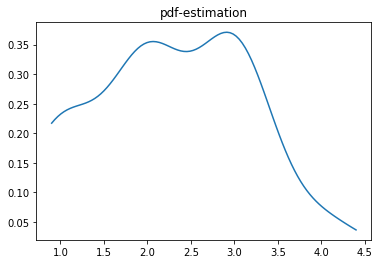

In [50]:
n, m, minmax, s, cv, perct, mode, skew, kurt, kde = numeric_statistics(reason_density_Otl.reason)

print('Число элементов выборки: {0:d}'.format(n))
print('Среднее значение: {0:.4f}'.format(m))
print('Минимальное и максимальное значения: ({0:.4f}, {1:.4f})'.format(*minmax))
print('Стандартное отклонение: {0:.4f}'.format(s))
print('Коэффициент вариации (Пирсона): {0:.4f}'.format(cv))
print('Квартили: (25%) = {0:.4f}, (50%) = {1:.4f}, (75%) = {2:.4f}'.format(*perct))
print('Коэффициент асимметрии: {0:.4f}'.format(skew))
print('Коэффициент эксцесса: {0:.4f}'.format(kurt))

figure()
plot(kde[0], kde[1])
title('pdf-estimation')
show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F04C323FD0>,
      dtype=object)

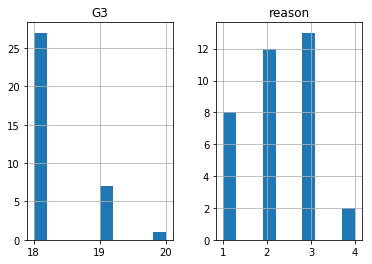

In [51]:
reason_density_Otl.hist(layout=(1,2))   

In [52]:
columns = ['reason', 'G3']

reason_density_Hor = pd.DataFrame(data, columns=columns)

reason_density_Hor.drop(reason_density_Hor[reason_density_Hor.G3 < 14].index, inplace=True)
reason_density_Hor.drop(reason_density_Hor[reason_density_Hor.G3 > 17 ].index, inplace=True)

reason_density_Hor.shape

(259, 2)

In [53]:
reason_density_Hor['reason'] = reason_density_Hor['reason'].map({'home': 1, 'reputation': 2, 'course': 3, 'other': 4})

In [54]:
reason_density_Hor.head(15)

reason  G3
0   3       14
1   3       17
3   1       16
7   3       14
11  1       17
21  3       16
22  2       14
28  4       15
32  2       15
34  3       14
40  4       14
44  2       15
45  2       16
46  2       15
53  1       16

Число элементов выборки: 259
Среднее значение: 2.2896
Минимальное и максимальное значения: (1.0000, 4.0000)
Стандартное отклонение: 0.9201
Коэффициент вариации (Пирсона): 0.3553
Квартили: (25%) = 2.0000, (50%) = 2.0000, (75%) = 3.0000
Коэффициент асимметрии: 0.0804
Коэффициент эксцесса: -0.9205


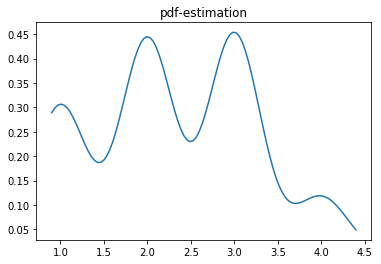

In [55]:
n, m, minmax, s, cv, perct, mode, skew, kurt, kde = numeric_statistics(reason_density_Hor.reason)

print('Число элементов выборки: {0:d}'.format(n))
print('Среднее значение: {0:.4f}'.format(m))
print('Минимальное и максимальное значения: ({0:.4f}, {1:.4f})'.format(*minmax))
print('Стандартное отклонение: {0:.4f}'.format(s))
print('Коэффициент вариации (Пирсона): {0:.4f}'.format(cv))
print('Квартили: (25%) = {0:.4f}, (50%) = {1:.4f}, (75%) = {2:.4f}'.format(*perct))
print('Коэффициент асимметрии: {0:.4f}'.format(skew))
print('Коэффициент эксцесса: {0:.4f}'.format(kurt))

figure()
plot(kde[0], kde[1])
title('pdf-estimation')
show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F04C3EA710>,
      dtype=object)

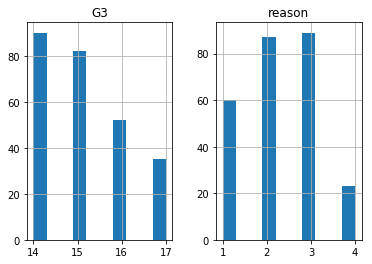

In [56]:
reason_density_Hor.hist(layout=(1,2))  

In [57]:
columns = ['reason', 'G3']

reason_density_Udv = pd.DataFrame(data, columns=columns)

reason_density_Udv.drop(reason_density_Udv[reason_density_Udv.G3 < 8].index, inplace=True)
reason_density_Udv.drop(reason_density_Udv[reason_density_Udv.G3 > 13].index, inplace=True)

reason_density_Udv.shape

(650, 2)

In [58]:
reason_density_Udv['reason'] = reason_density_Udv['reason'].map({'home': 1, 'reputation': 2, 'course': 3, 'other': 4})

In [59]:
reason_density_Udv.head(15)

reason  G3
2   3       10
4   1       13
5   3       12
6   3       9 
9   4       11
10  3       12
13  1       11
15  3       8 
16  1       8 
17  3       11
18  3       12
19  2       9 
20  3       8 
23  1       13
24  3       10

Число элементов выборки: 650
Среднее значение: 2.3877
Минимальное и максимальное значения: (1.0000, 4.0000)
Стандартное отклонение: 0.9832
Коэффициент вариации (Пирсона): 0.1513
Квартили: (25%) = 1.0000, (50%) = 3.0000, (75%) = 3.0000
Коэффициент асимметрии: -0.1662
Коэффициент эксцесса: -1.1363


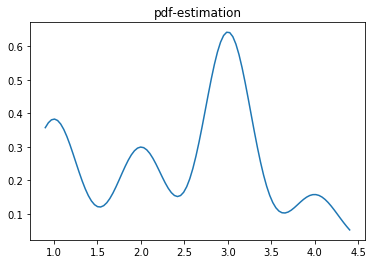

In [60]:
n, m, minmax, s, cv, perct, mode, skew, kurt, kde = numeric_statistics(reason_density_Udv.reason)

print('Число элементов выборки: {0:d}'.format(n))
print('Среднее значение: {0:.4f}'.format(m))
print('Минимальное и максимальное значения: ({0:.4f}, {1:.4f})'.format(*minmax))
print('Стандартное отклонение: {0:.4f}'.format(s))
print('Коэффициент вариации (Пирсона): {0:.4f}'.format(cv))
print('Квартили: (25%) = {0:.4f}, (50%) = {1:.4f}, (75%) = {2:.4f}'.format(*perct))
print('Коэффициент асимметрии: {0:.4f}'.format(skew))
print('Коэффициент эксцесса: {0:.4f}'.format(kurt))

figure()
plot(kde[0], kde[1])
title('pdf-estimation')
show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F04C47FE48>,
      dtype=object)

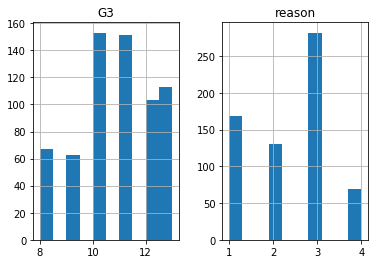

In [61]:
reason_density_Udv.hist(layout=(1,2))  

In [62]:
columns = ['reason', 'G3']

reason_density_Neudv = pd.DataFrame(data, columns=columns)

reason_density_Neudv.drop(reason_density_Neudv[reason_density_Neudv.G3 > 7].index, inplace=True)

reason_density_Neudv.shape

(100, 2)

In [63]:
reason_density_Neudv['reason'] = reason_density_Neudv['reason'].map({'home': 1, 'reputation': 2, 'course': 3, 'other': 4})

In [64]:
reason_density_Neudv.head(15)

reason  G3
8    2       6 
12   2       6 
14   3       6 
71   1       0 
74   3       5 
83   3       0 
92   2       7 
104  4       6 
109  4       7 
133  3       7 
137  3       5 
144  3       7 
152  2       0 
178  3       0 
184  3       0

Число элементов выборки: 100
Среднее значение: 2.5200
Минимальное и максимальное значения: (1.0000, 4.0000)
Стандартное отклонение: 0.9847
Коэффициент вариации (Пирсона): 0.9847
Квартили: (25%) = 2.0000, (50%) = 3.0000, (75%) = 3.0000
Коэффициент асимметрии: -0.3071
Коэффициент эксцесса: -0.9964


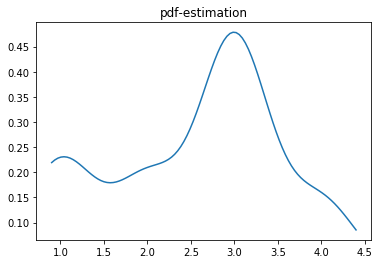

In [65]:
n, m, minmax, s, cv, perct, mode, skew, kurt, kde = numeric_statistics(reason_density_Neudv.reason)

print('Число элементов выборки: {0:d}'.format(n))
print('Среднее значение: {0:.4f}'.format(m))
print('Минимальное и максимальное значения: ({0:.4f}, {1:.4f})'.format(*minmax))
print('Стандартное отклонение: {0:.4f}'.format(s))
print('Коэффициент вариации (Пирсона): {0:.4f}'.format(cv))
print('Квартили: (25%) = {0:.4f}, (50%) = {1:.4f}, (75%) = {2:.4f}'.format(*perct))
print('Коэффициент асимметрии: {0:.4f}'.format(skew))
print('Коэффициент эксцесса: {0:.4f}'.format(kurt))

figure()
plot(kde[0], kde[1])
title('pdf-estimation')
show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F04C33AE48>,
      dtype=object)

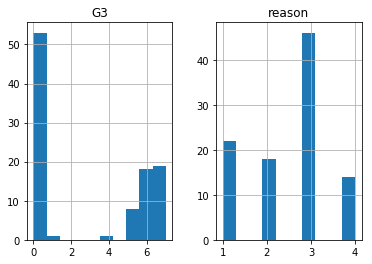

In [66]:
reason_density_Neudv.hist(layout=(1,2))  

In [67]:
columns = ['age','address', 'famsize',
           'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
           'paid','activities','nursery','higher', 'internet', 'romantic', 'famrel','freetime', 
           'goout', 'Dalc', 'Walc','health', 'absences', 'G1', 'G2','G3']

corr_data = pd.DataFrame(data, columns=columns)

corr_data.shape

(1044, 27)

In [68]:
corr_data.head(5)

age address famsize Pstatus  Medu  Fedu  traveltime  studytime  failures  \
0  16   U       GT3     A       3     4     1           1          0          
1  17   U       GT3     T       3     2     1           2          0          
2  16   U       LE3     T       1     2     2           1          2          
3  17   U       GT3     T       2     3     2           2          0          
4  16   U       GT3     T       1     1     2           1          0          

  schoolsup famsup paid activities nursery higher internet romantic  famrel  \
0  no        no     no   no         yes     yes    yes      no       3        
1  no        no     no   yes        no      yes    yes      no       5        
2  no        no     no   no         no      yes    yes      no       4        
3  no        no     no   yes        yes     yes    yes      no       4        
4  no        yes    no   no         yes     yes    no       no       4        

   freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0  2         1      1     4     5       12        15  13  14  
1  3         4      1     3     3       2         17  18  17  
2  4         5      3     5     5       0         9   8   10  
3  4         3      1     1     3       4         14  15  16  
4  3         2      1     4     5       2         12  13  13

In [69]:
corr_data['schoolsup'] = corr_data['schoolsup'].map({'yes': 1, 'no': 0})

In [70]:
corr_data['famsup'] = corr_data['famsup'].map({'yes': 1, 'no': 0})

In [71]:
corr_data['paid'] = corr_data['paid'].map({'yes': 1, 'no': 0})

In [72]:
corr_data['activities'] = corr_data['activities'].map({'yes': 1, 'no': 0})

In [73]:
corr_data['nursery'] = corr_data['nursery'].map({'yes': 1, 'no': 0})

In [74]:
corr_data['higher'] = corr_data['higher'].map({'yes': 1, 'no': 0})

In [75]:
corr_data['internet'] = corr_data['internet'].map({'yes': 1, 'no': 0})

In [76]:
corr_data['romantic'] = corr_data['romantic'].map({'yes': 1, 'no': 0})

In [77]:
corr_data['famsize'] = corr_data['famsize'].map({'GT3': 1, 'LE3': 0})

In [78]:
corr_data['address'] = corr_data['address'].map({'U': 1, 'R': 0})

In [79]:
corr_data['Pstatus'] = corr_data['Pstatus'].map({'T': 1, 'A': 0})

In [80]:
corr_data.head(5)

age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0  16   1        1        0        3     4     1           1           
1  17   1        1        1        3     2     1           2           
2  16   1        0        1        1     2     2           1           
3  17   1        1        1        2     3     2           2           
4  16   1        1        1        1     1     2           1           

   failures  schoolsup  famsup  paid  activities  nursery  higher  internet  \
0  0         0          0       0     0           1        1       1          
1  0         0          0       0     1           0        1       1          
2  2         0          0       0     0           0        1       1          
3  0         0          0       0     1           1        1       1          
4  0         0          1       0     0           1        1       0          

   romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0  0         3       2         1      1     4     5       12        15  13  14  
1  0         5       3         4      1     3     3       2         17  18  17  
2  0         4       4         5      3     5     5       0         9   8   10  
3  0         4       4         3      1     1     3       4         14  15  16  
4  0         4       3         2      1     4     5       2         12  13  13

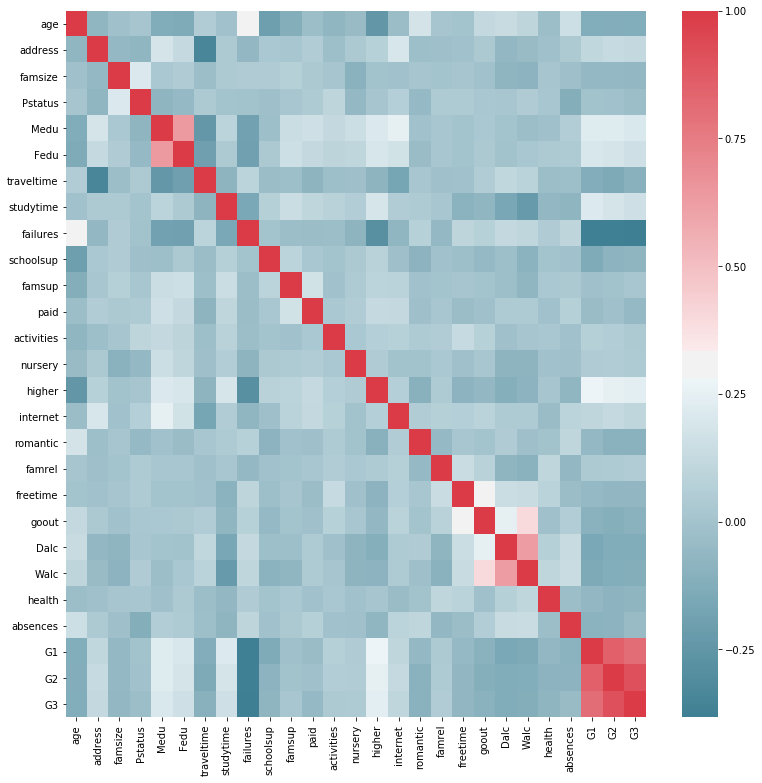

In [81]:
corr = corr_data.corr()
fig, ax = plt.subplots(figsize=(13,13))   
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [82]:
columns = ['Subject','school','sex','age','address', 'famsize',
           'Pstatus', 'Medu', 'Fedu','Mjob','Fjob','reason','guardian','traveltime', 
           'studytime', 'failures', 'schoolsup', 'famsup',
           'paid','activities','nursery','higher', 'internet', 'romantic', 'famrel','freetime', 
           'goout', 'Dalc', 'Walc','health', 'absences', 'G3']

lr_data = pd.DataFrame(data, columns=columns)

lr_data.shape

(1044, 32)

In [83]:
lr_data.head(10)

Subject school sex  age address famsize Pstatus  Medu  Fedu      Mjob  \
0  Por     GP     F   16   U       GT3     A       3     4     services   
1  Por     GP     F   17   U       GT3     T       3     2     other      
2  Por     GP     M   16   U       LE3     T       1     2     health     
3  Por     MS     M   17   U       GT3     T       2     3     other      
4  Por     GP     F   16   U       GT3     T       1     1     at_home    
5  Por     GP     M   18   U       LE3     T       3     1     services   
6  Por     MS     F   18   U       GT3     T       1     1     other      
7  Por     MS     F   15   R       GT3     T       4     4     teacher    
8  Math    GP     F   15   U       LE3     T       3     2     services   
9  Por     MS     M   16   R       GT3     T       3     4     other      

       Fjob      reason guardian  traveltime  studytime  failures schoolsup  \
0  other     course      father   1           1          0         no         
1  other     course      mother   1           2          0         no         
2  services  course      mother   2           1          2         no         
3  services  home        father   2           2          0         no         
4  other     home        mother   2           1          0         no         
5  services  course      mother   2           1          0         no         
6  other     course      mother   2           2          0         no         
7  other     course      mother   2           1          0         no         
8  other     reputation  mother   1           2          0         no         
9  health    other       mother   3           2          0         no         

  famsup paid activities nursery higher internet romantic  famrel  freetime  \
0  no     no   no         yes     yes    yes      no       3       2          
1  no     no   yes        no      yes    yes      no       5       3          
2  no     no   no         no      yes    yes      no       4       4          
3  no     no   yes        yes     yes    yes      no       4       4          
4  yes    no   no         yes     yes    no       no       4       3          
5  no     no   yes        yes     yes    yes      yes      3       3          
6  no     no   yes        yes     yes    no       no       1       1          
7  no     no   no         yes     yes    yes      yes      1       5          
8  yes    yes  no         yes     yes    yes      no       4       4          
9  no     no   no         no      yes    no       no       3       4          

   goout  Dalc  Walc  health  absences  G3  
0  1      1     4     5       12        14  
1  4      1     3     3       2         17  
2  5      3     5     5       0         10  
3  3      1     1     3       4         16  
4  2      1     4     5       2         13  
5  4      4     5     4       2         12  
6  1      1     1     5       6         9   
7  1      3     5     5       0         14  
8  4      1     1     5       10        6   
9  5      1     2     5       4         11

In [84]:
lr_data['famsup'] = lr_data['famsup'].map({'yes': 1, 'no': 0})

In [85]:
lr_data['schoolsup'] = lr_data['schoolsup'].map({'yes': 1, 'no': 0})

In [86]:
lr_data['paid'] = lr_data['paid'].map({'yes': 1, 'no': 0})

In [87]:
lr_data['activities'] = lr_data['activities'].map({'yes': 1, 'no': 0})

In [88]:
lr_data['nursery'] = lr_data['nursery'].map({'yes': 1, 'no': 0})

In [89]:
lr_data['higher'] = lr_data['higher'].map({'yes': 1, 'no': 0})

In [90]:
lr_data['internet'] = lr_data['internet'].map({'yes': 1, 'no': 0})

In [91]:
lr_data['romantic'] = lr_data['romantic'].map({'yes': 1, 'no': 0})

In [92]:
lr_data['Subject'] = lr_data['Subject'].map({'Por': 1, 'Math': 0})

In [93]:
lr_data['famsize'] = lr_data['famsize'].map({'GT3': 1, 'LE3': 0})

In [94]:
lr_data['reason'] = lr_data['reason'].map({'home': 1, 'reputation': 2, 'course': 3, 'other': 4})

In [95]:
lr_data['address'] = lr_data['address'].map({'U': 1, 'R': 0})

In [96]:
lr_data['Pstatus'] = lr_data['Pstatus'].map({'T': 1, 'A': 0})

In [97]:
lr_data['Mjob'] = lr_data['Mjob'].map({'teacher': 3, 'health': 4, 'services': 5, 'at_home': 2, 'other': 1 })

In [98]:
lr_data['Fjob'] = lr_data['Fjob'].map({'teacher': 3, 'health': 4, 'services': 5, 'at_home': 2, 'other': 1 })

In [99]:
lr_data['guardian'] = lr_data['guardian'].map({'father': 1, 'mother': 0 })

In [100]:
lr_data['school'] = lr_data['school'].map({'GP': 1, 'MS': 0 })

In [101]:
lr_data['sex'] = lr_data['sex'].map({'M': 1, 'F': 0 })

In [102]:
lr_data.head(10)

Subject  school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  \
0  1        1       0    16   1        1        0        3     4     5      
1  1        1       0    17   1        1        1        3     2     1      
2  1        1       1    16   1        0        1        1     2     4      
3  1        0       1    17   1        1        1        2     3     1      
4  1        1       0    16   1        1        1        1     1     2      
5  1        1       1    18   1        0        1        3     1     5      
6  1        0       0    18   1        1        1        1     1     1      
7  1        0       0    15   0        1        1        4     4     3      
8  0        1       0    15   1        0        1        3     2     5      
9  1        0       1    16   0        1        1        3     4     1      

   Fjob  reason  guardian  traveltime  studytime  failures  schoolsup  famsup  \
0  1     3       1.0       1           1          0         0          0        
1  1     3       0.0       1           2          0         0          0        
2  5     3       0.0       2           1          2         0          0        
3  5     1       1.0       2           2          0         0          0        
4  1     1       0.0       2           1          0         0          1        
5  5     3       0.0       2           1          0         0          0        
6  1     3       0.0       2           2          0         0          0        
7  1     3       0.0       2           1          0         0          0        
8  1     2       0.0       1           2          0         0          1        
9  4     4       0.0       3           2          0         0          0        

   paid  activities  nursery  higher  internet  romantic  famrel  freetime  \
0  0     0           1        1       1         0         3       2          
1  0     1           0        1       1         0         5       3          
2  0     0           0        1       1         0         4       4          
3  0     1           1        1       1         0         4       4          
4  0     0           1        1       0         0         4       3          
5  0     1           1        1       1         1         3       3          
6  0     1           1        1       0         0         1       1          
7  0     0           1        1       1         1         1       5          
8  1     0           1        1       1         0         4       4          
9  0     0           0        1       0         0         3       4          

   goout  Dalc  Walc  health  absences  G3  
0  1      1     4     5       12        14  
1  4      1     3     3       2         17  
2  5      3     5     5       0         10  
3  3      1     1     3       4         16  
4  2      1     4     5       2         13  
5  4      4     5     4       2         12  
6  1      1     1     5       6         9   
7  1      3     5     5       0         14  
8  4      1     1     5       10        6   
9  5      1     2     5       4         11

In [103]:
result = sm.ols(formula="G3 ~ Subject + school + sex + age + address + famsize + Pstatus + Medu + Fedu + Mjob + Fjob + reason + guardian + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences", data=lr_data).fit()

In [104]:
result.params

Intercept     8.566054
Subject       1.813786
school        0.994577
sex          -0.199612
age          -0.030275
address       0.407461
famsize      -0.581046
Pstatus      -0.003465
Medu          0.249851
Fedu          0.160466
Mjob          0.162118
Fjob         -0.061089
reason       -0.011424
guardian      0.326929
traveltime    0.038795
studytime     0.360334
failures     -1.800174
schoolsup    -1.346494
famsup       -0.307635
paid          0.050107
activities    0.110088
nursery      -0.446683
higher        1.767412
internet      0.345588
romantic     -0.490696
famrel        0.114820
freetime      0.018422
goout        -0.179906
Dalc         -0.214391
Walc         -0.004711
health       -0.220996
absences      0.005278
dtype: float64

In [105]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     12.46
Date:                Sun, 27 May 2018   Prob (F-statistic):           2.26e-51
Time:                        02:36:30   Log-Likelihood:                -2521.1
No. Observations:                 971   AIC:                             5106.
Df Residuals:                     939   BIC:                             5262.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5661      2.068      4.141      0.000       4.507      12.625
Subject        1.8138      0.264      6.879      0.000       1.296       2.331
school         0.9946      0.293      3.397      0.001       0.420       1.569
sex           -0.1996      0.250     -0.798      0.425      -0.691       0.291
age           -0.0303      0.104     -0.290      0.772      -0.235       0.174
address        0.4075      0.270      1.507      0.132      -0.123       0.938
famsize       -0.5810      0.246     -2.357      0.019      -1.065      -0.097
Pstatus       -0.0035      0.366     -0.009      0.992      -0.721       0.714
Medu           0.2499      0.136      1.835      0.067      -0.017       0.517
Fedu           0.1605      0.131      1.222      0.222      -0.097       0.418
Mjob           0.1621      0.075      2.152      0.032       0.014       0.310
Fjob          -0.0611      0.065     -0.937      0.349      -0.189       0.067
reason        -0.0114      0.117     -0.098      0.922      -0.241       0.218
guardian       0.3269      0.258      1.266      0.206      -0.180       0.834
traveltime     0.0388      0.163      0.238      0.812      -0.281       0.358
studytime      0.3603      0.140      2.575      0.010       0.086       0.635
failures      -1.8002      0.193     -9.331      0.000      -2.179      -1.422
schoolsup     -1.3465      0.349     -3.863      0.000      -2.030      -0.662
famsup        -0.3076      0.233     -1.321      0.187      -0.765       0.150
paid           0.0501      0.311      0.161      0.872      -0.560       0.660
activities     0.1101      0.223      0.493      0.622      -0.328       0.548
nursery       -0.4467      0.281     -1.589      0.112      -0.998       0.105
higher         1.7674      0.442      4.001      0.000       0.901       2.634
internet       0.3456      0.286      1.209      0.227      -0.215       0.907
romantic      -0.4907      0.234     -2.096      0.036      -0.950      -0.031
famrel         0.1148      0.119      0.962      0.336      -0.119       0.349
freetime       0.0184      0.114      0.161      0.872      -0.206       0.242
goout         -0.1799      0.109     -1.658      0.098      -0.393       0.033
Dalc          -0.2144      0.162     -1.326      0.185      -0.532       0.103
Walc          -0.0047      0.122     -0.039      0.969      -0.243       0.234
health        -0.2210      0.077     -2.866      0.004      -0.372      -0.070
absences       0.0053      0.019      0.275      0.784      -0.032       0.043
==============================================================================
Omnibus:                      150.223   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.546
Skew:                          -0.887   Prob(JB):                     1.83e-69
Ku

In [106]:
result = sm.ols(formula="G3 ~ Subject + school + sex + address + famsize + Pstatus + Medu + Fedu + Mjob + Fjob + reason + guardian + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences", data=lr_data).fit()

In [107]:
result.params

Intercept     8.051762
Subject       1.813799
school        1.005872
sex          -0.196085
address       0.408550
famsize      -0.579466
Pstatus      -0.009082
Medu          0.250431
Fedu          0.160018
Mjob          0.162236
Fjob         -0.060487
reason       -0.010460
guardian      0.333009
traveltime    0.040598
studytime     0.356298
failures     -1.808315
schoolsup    -1.329343
famsup       -0.301150
paid          0.051125
activities    0.114437
nursery      -0.446573
higher        1.785295
internet      0.344182
romantic     -0.498782
famrel        0.112039
freetime      0.020977
goout        -0.181711
Dalc         -0.216423
Walc         -0.006262
health       -0.220501
absences      0.004776
dtype: float64

In [108]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     12.88
Date:                Sun, 27 May 2018   Prob (F-statistic):           6.46e-52
Time:                        02:36:31   Log-Likelihood:                -2521.1
No. Observations:                 971   AIC:                             5104.
Df Residuals:                     940   BIC:                             5256.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0518      1.067      7.549      0.000       5.959      10.145
Subject        1.8138      0.264      6.882      0.000       1.297       2.331
school         1.0059      0.290      3.468      0.001       0.437       1.575
sex           -0.1961      0.250     -0.785      0.433      -0.686       0.294
address        0.4086      0.270      1.512      0.131      -0.122       0.939
famsize       -0.5795      0.246     -2.353      0.019      -1.063      -0.096
Pstatus       -0.0091      0.365     -0.025      0.980      -0.725       0.707
Medu           0.2504      0.136      1.840      0.066      -0.017       0.517
Fedu           0.1600      0.131      1.220      0.223      -0.097       0.417
Mjob           0.1622      0.075      2.155      0.031       0.014       0.310
Fjob          -0.0605      0.065     -0.929      0.353      -0.188       0.067
reason        -0.0105      0.117     -0.090      0.929      -0.240       0.219
guardian       0.3330      0.257      1.294      0.196      -0.172       0.838
traveltime     0.0406      0.163      0.250      0.803      -0.279       0.360
studytime      0.3563      0.139      2.560      0.011       0.083       0.629
failures      -1.8083      0.191     -9.479      0.000      -2.183      -1.434
schoolsup     -1.3293      0.343     -3.872      0.000      -2.003      -0.656
famsup        -0.3012      0.232     -1.299      0.194      -0.756       0.154
paid           0.0511      0.311      0.165      0.869      -0.558       0.661
activities     0.1144      0.222      0.514      0.607      -0.322       0.551
nursery       -0.4466      0.281     -1.590      0.112      -0.998       0.105
higher         1.7853      0.437      4.084      0.000       0.927       2.643
internet       0.3442      0.286      1.205      0.229      -0.216       0.905
romantic      -0.4988      0.232     -2.147      0.032      -0.955      -0.043
famrel         0.1120      0.119      0.942      0.346      -0.121       0.345
freetime       0.0210      0.114      0.184      0.854      -0.202       0.244
goout         -0.1817      0.108     -1.678      0.094      -0.394       0.031
Dalc          -0.2164      0.162     -1.340      0.181      -0.533       0.101
Walc          -0.0063      0.121     -0.052      0.959      -0.245       0.232
health        -0.2205      0.077     -2.862      0.004      -0.372      -0.069
absences       0.0048      0.019      0.250      0.803      -0.033       0.042
==============================================================================
Omnibus:                      151.173   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.778
Skew:                          -0.891   Prob(JB):                     3.64e-70
Kurtosis:                       5.175   Cond. No.                         116.
==

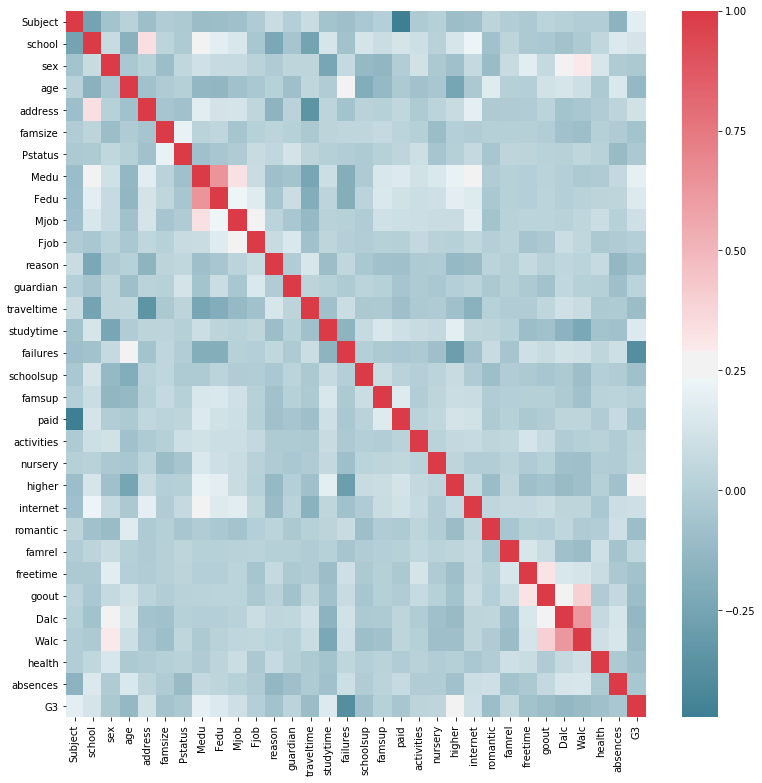

In [109]:
corr = lr_data.corr()
fig, ax = plt.subplots(figsize=(13,13))   
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [110]:
lr_data.drop('age', axis=1, inplace=True)

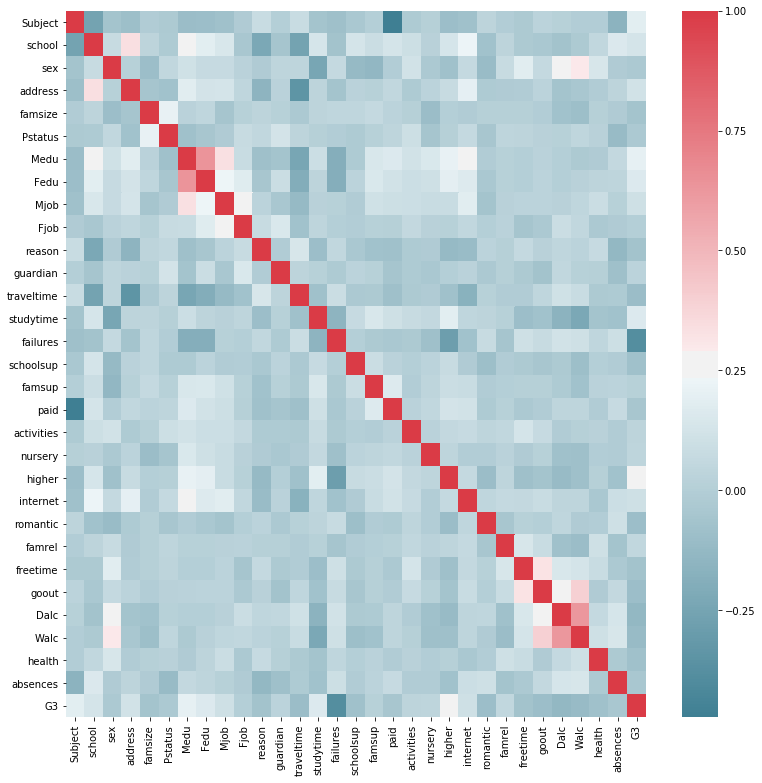

In [111]:
corr = lr_data.corr()
fig, ax = plt.subplots(figsize=(13,13))   
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [112]:
lr_data.drop('Fjob', axis=1, inplace=True)

In [113]:
lr_data.drop('Walc', axis=1, inplace=True)

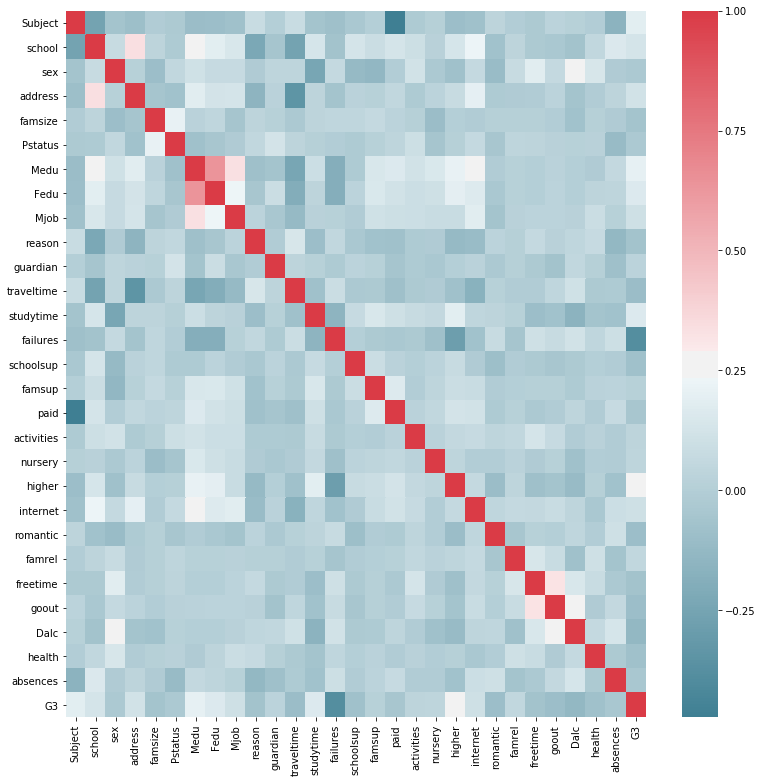

In [114]:
corr = lr_data.corr()
fig, ax = plt.subplots(figsize=(13,13))   
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [115]:
result = sm.ols(formula="G3 ~ Subject + school + sex + address + famsize + Fedu + Medu + Mjob + guardian + traveltime + studytime + failures + schoolsup + famsup + activities + nursery + higher + internet + romantic + famrel + goout + Dalc + health", data=lr_data).fit()

In [116]:
lr_data.drop('absences', axis=1, inplace=True)

In [117]:
lr_data.drop('paid', axis=1, inplace=True)

In [118]:
lr_data.drop('reason', axis=1, inplace=True)

In [119]:
lr_data.drop('Pstatus', axis=1, inplace=True)

In [120]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     16.86
Date:                Sun, 27 May 2018   Prob (F-statistic):           7.58e-56
Time:                        02:36:34   Log-Likelihood:                -2521.7
No. Observations:                 971   AIC:                             5091.
Df Residuals:                     947   BIC:                             5208.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9831      0.942      8.472      0.000       6.134       9.832
Subject        1.7850      0.229      7.806      0.000       1.336       2.234
school         1.0414      0.282      3.697      0.000       0.489       1.594
sex           -0.1980      0.244     -0.811      0.417      -0.677       0.281
address        0.3987      0.268      1.489      0.137      -0.127       0.924
famsize       -0.5857      0.239     -2.451      0.014      -1.055      -0.117
Fedu           0.1401      0.129      1.088      0.277      -0.113       0.393
Medu           0.2646      0.134      1.975      0.049       0.002       0.528
Mjob           0.1437      0.072      1.984      0.048       0.002       0.286
guardian       0.2938      0.251      1.169      0.243      -0.200       0.787
traveltime     0.0447      0.161      0.278      0.781      -0.272       0.361
studytime      0.3465      0.136      2.540      0.011       0.079       0.614
failures      -1.8120      0.189     -9.570      0.000      -2.184      -1.440
schoolsup     -1.3273      0.340     -3.905      0.000      -1.994      -0.660
famsup        -0.2888      0.227     -1.275      0.203      -0.733       0.156
activities     0.1102      0.219      0.504      0.615      -0.319       0.540
nursery       -0.4450      0.279     -1.593      0.112      -0.993       0.103
higher         1.8008      0.433      4.158      0.000       0.951       2.651
internet       0.3496      0.283      1.236      0.217      -0.206       0.905
romantic      -0.4970      0.230     -2.159      0.031      -0.949      -0.045
famrel         0.1104      0.117      0.947      0.344      -0.118       0.339
goout         -0.1710      0.096     -1.775      0.076      -0.360       0.018
Dalc          -0.2249      0.132     -1.708      0.088      -0.483       0.034
health        -0.2158      0.076     -2.847      0.005      -0.365      -0.067
==============================================================================
Omnibus:                      153.660   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.806
Skew:                          -0.900   Prob(JB):                     3.99e-72
Kurtosis:                       5.211   Cond. No.                         79.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""